In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

In [2]:
N = 300
X, y = datasets.make_moons(N, noise=0.3)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

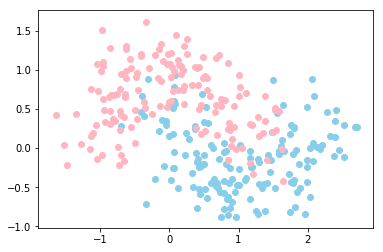

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], color='skyblue')
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], color='lightpink')
plt.show()

In [6]:
Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [7]:
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 入力層 - 隠れ層
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# 隠れ層 - 出力層
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_predict = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [8]:
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [9]:
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [10]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

accuracy:  0.85
